In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import cluster

In [66]:
def KMeans(K, data):
    d = np.size(data, axis=0)
    N = np.size(data, axis=1)
    
    #Centra grup (losowe wektory z danych)
    R = data[:, np.random.randint(N, size=K)]
    #Przynależnosc do grupy (na poczatku wszyscy do zero)
    C = np.zeros((1,N), dtype=np.int64)

    groupsChanged = True
    while groupsChanged:
        #Interesuje nas minimalna wartość <r,r> -2<u,r>, gdzie u to wektor z danych a r to jakies centrum
        iloczynySkalarne = -2. * np.dot(data.T, R)
        R**=2
        kwadratyDlugosciR = np.sum(R, axis=0, keepdims=True)
        iloczynySkalarne += kwadratyDlugosciR

        #Dla kazdego wektora z danych wybieramy najblizszy wektor z R i aktualizujemy grupy
        newC = np.argmin(iloczynySkalarne, axis=1)
        groupsChanged = np.array_equal(C, newC)
        C = newC

        #Obliczamy srodki ciezkosci dla kazdej grupy
        macierzPrzynaleznosci = np.zeros((N,K))
        for i in range(N):
            macierzPrzynaleznosci[i][C[i]] = 1
        #Sumy danych w każdej z grup
        R = np.dot(data, macierzPrzynaleznosci)
        liczebnosciGrup = np.sum(macierzPrzynaleznosci, axis=0, keepdims=True)
        R /= liczebnosciGrup

    return (C, R)

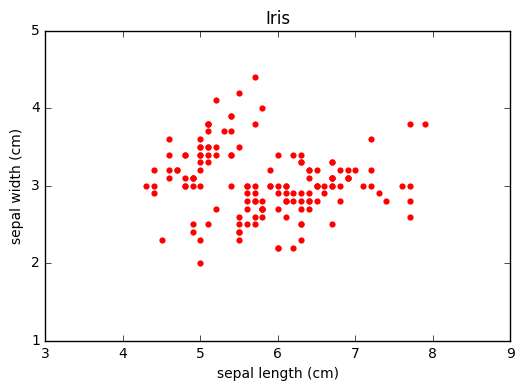

In [67]:
iris = datasets.load_iris()

plt.scatter(iris.data[:, 0], iris.data[:, 1], c="Red", marker='o', lw = 0)
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

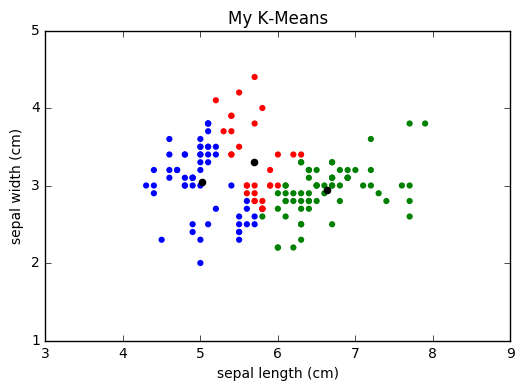

In [72]:
# Robimy sobie wektor d x N potrzebny do KMeans
irisData = np.array(iris.data).T
groups, centers = KMeans(3, irisData[:2,:])

colormap={0: 'Red', 1:'Blue', 2:'Green'}
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=[colormap[i] for i in groups], marker='o', lw = 0)
plt.scatter(centers[0,:], centers[1,:], c="Black", marker='o', lw = 1)
plt.title("My K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

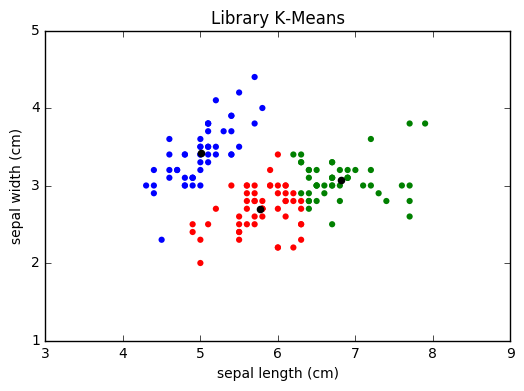

In [73]:
irisData = np.array(iris.data)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(irisData[:,:2])

colormap={0: 'Red', 1:'Blue', 2:'Green'}
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=[colormap[i] for i in kmeans.labels_], marker='o', lw = 0)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="Black", marker='o', lw = 1)
plt.title("Library K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

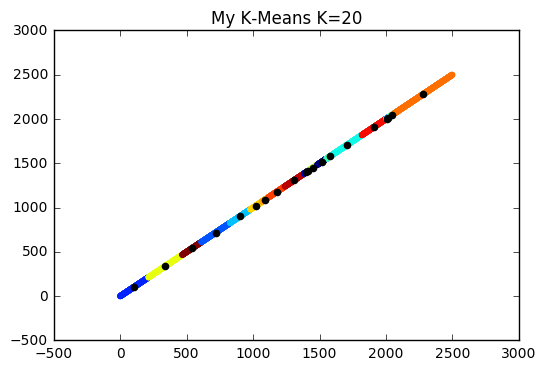

In [70]:
X = np.array([np.arange(2500), np.arange(2500)])
groups, centers = KMeans(20, X)

plt.scatter(X[0,:], X[1,:], c=groups, marker='o', lw = 0)
plt.scatter(centers[0,:], centers[1,:], c="Black", marker='o', lw = 1)
plt.title("My K-Means K=20")
plt.show()

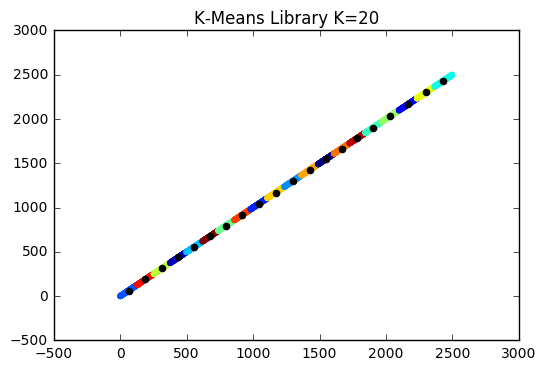

In [71]:
X = np.array([np.arange(2500), np.arange(2500)])
kmeans = cluster.KMeans(n_clusters=20, random_state=0).fit(X.T)

plt.scatter(X[0,:], X[1,:], c=kmeans.labels_, marker='o', lw = 0)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="Black", marker='o', lw = 1)
plt.title("K-Means Library K=20")
plt.show()